In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
games_df = pd.read_csv('games.csv')

In [26]:
games_df

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1
...,...,...,...,...,...,...
248,2018123013,2018-12-30,16:25:00,DEN,LAC,17
249,2018123015,2018-12-30,16:25:00,SEA,ARI,17
250,2018123014,2018-12-30,16:25:00,LA,SF,17
251,2018122200,2018-12-22,16:30:00,TEN,WAS,16


In [5]:
games_df.shape

(253, 6)

In [6]:
## Converting to fit pandas date time format
games_df['gameDate'] = pd.to_datetime(games_df['gameDate']).dt.date
games_df['gameTimeEastern'] = pd.to_datetime(games_df['gameTimeEastern']).dt.time

games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


In [13]:
## Looking for the frequency of games per date

gamefreq_df = games_df['gameDate'].value_counts().reset_index()

## Column renaming

gamefreq_df.columns = ['date', '# of games']

In [14]:
gamefreq_df

,date,# of games
0,2018-12-30,16
1,2018-12-09,14
2,2018-12-02,14
3,2018-09-16,14
4,2018-09-23,14
5,2018-09-30,13
6,2018-12-23,13
7,2018-10-14,13
8,2018-10-07,13
9,2018-10-21,12


In [15]:
## Setting date as the index for the dataframe

sorted_gamefreq_df = gamefreq_df.sort_values('date').set_index('date')
sorted_gamefreq_df

,# of games
date,
2018-09-06,1
2018-09-09,10
2018-09-10,2
2018-09-13,1
2018-09-16,14
2018-09-17,1
2018-09-20,1
2018-09-23,14
2018-09-24,1


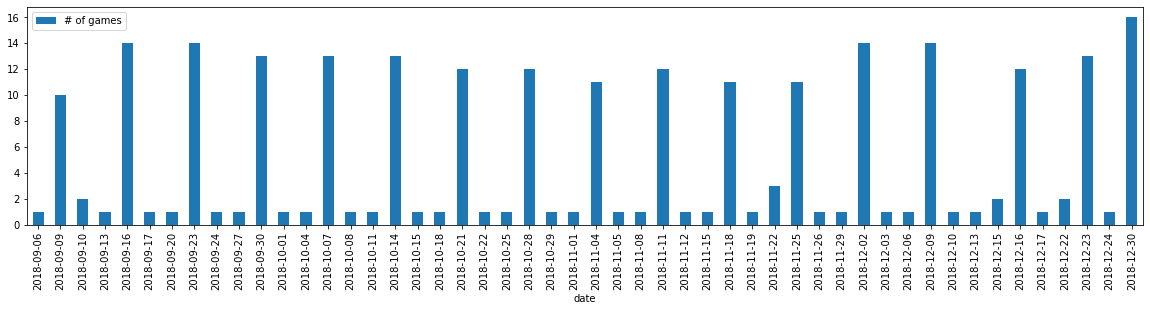

In [59]:
## Plot findings

## Bar plot
sorted_gamefreq_df.plot(kind='bar', figsize=(20,4))

True

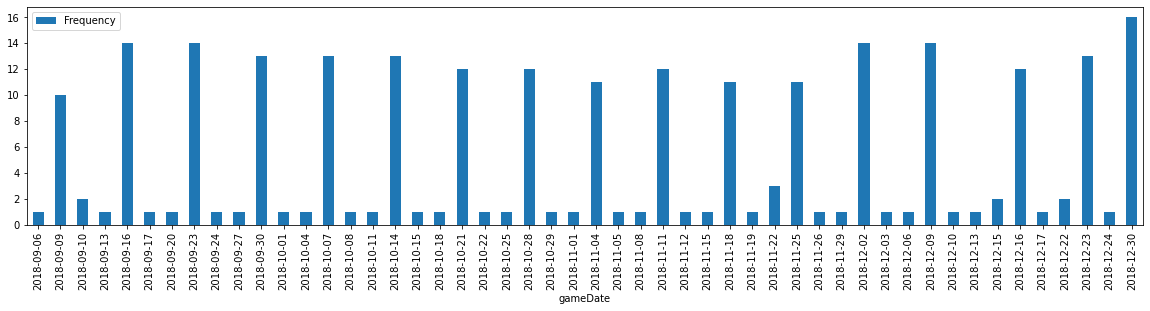

In [22]:
## Converting the above to a function

def find_dist(df, col_name):
    # Create a df of frequency of games in releation to column values
    gamefreqdf = df[col_name].value_counts().reset_index()
    
    #Renaming columns
    gamefreqdf.columns = [col_name, 'Frequency']
    
    # Sorting df by values
    sorted_gamefreqdf = gamefreqdf.sort_values(col_name, ascending=True).set_index(col_name)
    
    # Plotting a bar plot
    sorted_gamefreqdf.plot(kind='bar', figsize = (20,4))
    
    return True

find_dist(games_df,'gameDate')

In [23]:
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


True

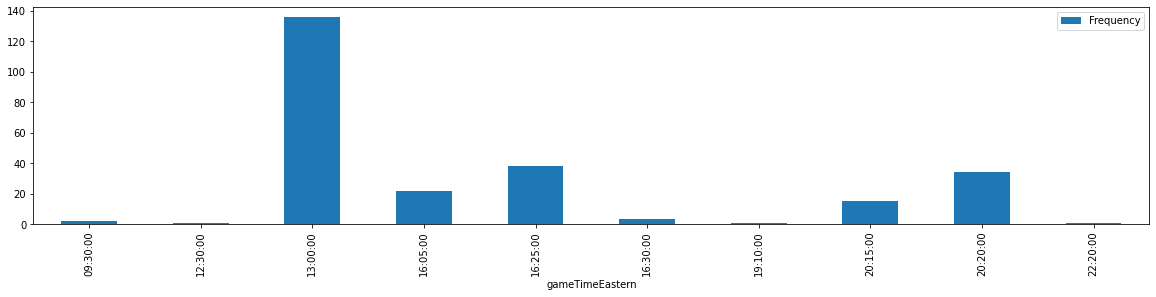

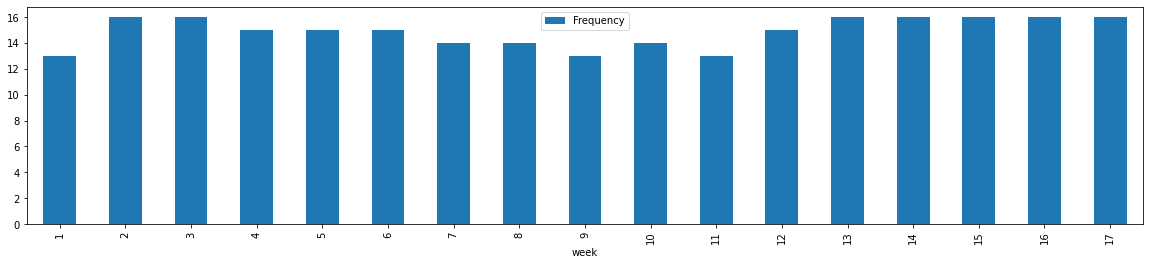

In [25]:
find_dist(games_df, 'gameTimeEastern')
find_dist(games_df, 'week')

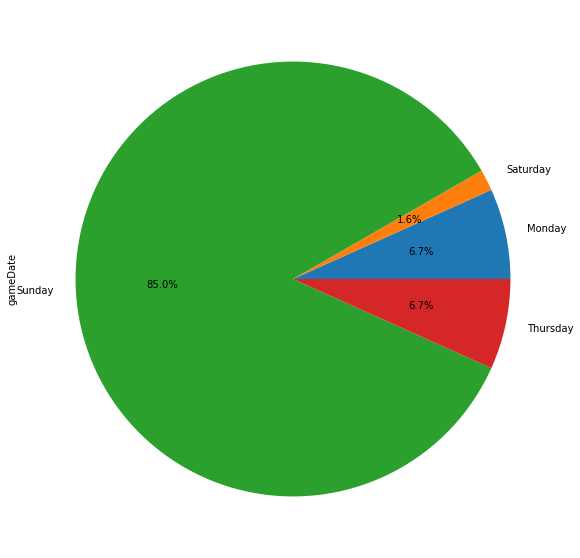

In [53]:
# Assign the dates to the day of the week

games_df['gameDay'] = games_df['gameDate'].apply(lambda x: x.strftime('%A'))

#Distribution for the week in pie chart
games_df.groupby('gameDay')['gameDate'].count().plot.pie(figsize=(10,10),autopct='%1.1f%%')